# Todo

## Librerias

In [ ]:
# !git clone https://github.com/lhkhiem28/lightx3ecg #Repo Khiem
!git clone https://github.com/isma40000/LightX3ECG.git #Fork nuestro

fatal: destination path 'LightX3ECG' already exists and is not an empty directory.


In [ ]:
# !pip install sierraecg &> /dev/null
# !pip install h5py &> /dev/null
# !pip install wfdb &> /dev/null
# !pip install tensorflow &> /dev/null
# !pip install xmljson &> /dev/null
# !pip install tqdm &> /dev/null


# !pip3 install pytorch_lightning &> /dev/null
# !pip3 install neurokit2 &> /dev/null
# !pip3 install captum &> /dev/null
# !pip3 install keras &> /dev/null
# !pip3 install keras_preprocessing &> /dev/null

### Comprobar si están todos los numpy necesarios

In [ ]:
!cd drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy

In [8]:
!ls -1 drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy | tail -5

JS10642.npy
JS10643.npy
JS10644.npy
JS10645.npy
JS10646.npy


In [ ]:
''' import numpy as np
import pandas as pd
from numpy import zeros, newaxis
import h5py
import wfdb
import wfdb.io.convert.csv
from pkgutil import iter_modules
import scipy.signal  as sgn
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
import base64
import os
import time
from sierraecg import read_file
import sierraecg.lib as sl

os.system("cp -a /content/drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/. /content/") '''

### Modificar archivo lib


Modificar libs.py para que tenga keras_preprocessing. https://stackoverflow.com/questions/72326025/cannot-import-name-pad-sequences-from-keras-preprocessing-sequence

In [ ]:
!echo -e 'import os, sys;\nimport warnings; warnings.filterwarnings("ignore")\nimport pytorch_lightning;\npytorch_lightning.seed_everything(22);\nfrom tqdm import tqdm;\nimport argparse;\nimport random;\nimport pandas, numpy as np;\nimport neurokit2 as nk;\nimport torch;\nimport torch.nn as nn, torch.optim as optim;\nimport torch.nn.functional as F;\nimport torch.nn.utils.prune as prune;\nimport captum.attr as attr;\nimport matplotlib.pyplot as pyplot;\nfrom keras_preprocessing.sequence import pad_sequences;\nfrom sklearn.metrics import f1_score;\n' > /content/LightX3ECG/source/libs.py

In [11]:
import importlib.util
import sys
import os
# import tensorflow.keras as keras
spec = importlib.util.spec_from_file_location("module.name", "./LightX3ECG/source/libs.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)
# foo.MyClass()
spec = importlib.util.spec_from_file_location("module.name", "./LightX3ECG/source/configVars.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)

Global seed set to 22


In [ ]:
casos = ['A0192','A1778','A5452','A0370','A1007','A2472','A0741',
         'A3811','A5868','A0977','A1213','A1754','A0345','A2701',
         'A3568','A3046','A3342','A3525','A2808','A3542','A6343',
         'A0432','A0984','A2260','A0054','A5431','A5673']
casos.sort()
print(casos)


['A0054', 'A0192', 'A0345', 'A0370', 'A0432', 'A0741', 'A0977', 'A0984', 'A1007', 'A1213', 'A1754', 'A1778', 'A2260', 'A2472', 'A2701', 'A2808', 'A3046', 'A3342', 'A3525', 'A3542', 'A3568', 'A3811', 'A5431', 'A5452', 'A5673', 'A5868', 'A6343']


## Opciones comando train.py

In [14]:
!python3 train.py -h

Global seed set to 22
usage: train.py [-h] [--dataset DATASET] [--num_classes NUM_CLASSES]
                [--multilabel] [--num_gpus NUM_GPUS]

optional arguments:
  -h, --help            show this help message and exit
  --dataset DATASET
  --num_classes NUM_CLASSES
  --multilabel
  --num_gpus NUM_GPUS


## Entrenar modelo + Predecir

### Chapman

In [2]:
%cd LightX3ECG/source

/scratch/tfg_luis_2223/LightX3ECG/source


In [6]:
!python3 tools/train.py --dataset "Chapman" --num_classes 4 --multilabel --num_gpus 4

Global seed set to 22
Namespace(dataset='Chapman', multilabel=True, num_classes=4, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.17it/s]
epoch  2/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.26it/s]
epoch  3/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.24it/s]
epoch  4/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.49it/s]
epoch  5/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.41it/s]

Start Evaluation ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  7.40it/s]
############Validation###########


Precision:[0. 0. 0. 0.]
(4,)
Recall:[0. 0. 0. 0.]
(4,)
F1:[0. 0. 0. 0.]
(4,)

[[0. 0. 0. 0.]
 [0. 

In [3]:
!python3 tools/predict.py --dataset "Chapman" --num_classes 4 --multilabel --num_gpus 4

Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [01:15<00:00, 75.69s/it]
[array([9.9432063e-01, 6.8678516e-03, 2.4925689e-03, 5.5996697e-06,
       2.3427798e-05, 4.4658751e-05, 6.1936502e-04, 8.6476386e-05,
       1.3120396e-01], dtype=float32), array([2.2371585e-04, 1.2754495e-07, 9.9871194e-01, 1.1462319e-04,
       9.2495538e-05, 1.8329858e-03, 1.4670632e-05, 9.5469615e-05,
       7.3622908e-03], dtype=float32), array([9.0681118e-01, 6.7681125e-05, 2.0335477e-03, 6.4884647e-05,
       6.3042557e-05, 1.0013755e-02, 2.4165246e-03, 5.5445533e-04,
       1.4090148e-01], dtype=float32), array([2.6080493e-02, 8.3533311e-01, 8.7210955e-03, 8.0422703e-03,
       1.1490795e-04, 1.2717454e-01, 1.2875887e-04, 3.6404024e-06,
       1.8415127e-02], dtype=float32), array([3.5844519e-06, 1.1824021e-03, 1.3169744e-04, 1.1522337e-02,
       3.2911643e-02, 7.2515659e-02, 9.9816985e-02, 4.8697717e-04,
       6.0125083e-01], dtype=float32), array([6.2512117e-04, 1.2191811

### CPSC-2018

In [31]:
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

Global seed set to 22
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/70
----------------
100%|███████████████████████████████████████████| 97/97 [00:29<00:00,  3.31it/s]
#################################################################
Forma de las running_labels: (5432, 9)

[array([0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0

In [27]:
%cd LightX3ECG/source/
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.14it/s]
epoch  2/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.02it/s]
epoch  3/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.18it/s]
epoch  4/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.90it/s]
epoch  5/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.93it/s]
epoch  6/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.01it/s]
epoch  7/70
----------------
100%|█████████████████████████████████████████

In [20]:
%cd LightX3ECG/source/
!python3 tools/predict.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.72s/it]
El reshapeo del array(33, 9)
El reshapeo del array(33, 9)
Forma de las running_labels:

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 

--dataset --> puede ser "Chapman" o "CPSC-2018", si no lo pones no corre

--num_classes --> número de posibles enfermedades parece

--multilabel --> se pone o no,no hace nada falta poner nada más

### Fragmento de código para debugear + Batch_Size

Parece ser que peta por espacio si los batch_size son demasiado grandes, esto se cambia en train.py, linea 26-45. Además este código de debajo permite ver cómo está repartida la memoria de CUDA.

In [ ]:
# %env PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:1024
import os
import torch
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = "max_split_size_mb:1024"
#!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'
#!echo $PYTORCH_CUDA_ALLOC_CONF
#torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

## Convertir .mat a numpy y distintos formatos de numpy

### Mat a numpy

Carga los archivos .mat de un directorio y los guarda en formato .npy

**Variables**\
fsource : path del archivo .mat\
fdest : path del archivo .npy\
data : array del archivo .mat

In [ ]:
import scipy.io
import numpy as np
import os

def toNumpy(source,dest,name):
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.mat'):
            mat = scipy.io.loadmat(fsource)
            data = mat[name]
            np.save(fdest[:-4], data)

#### CPSC-2018

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/'

toNumpy(source,dest,"ECG")

#### Chapman

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy/'

toNumpy(source,dest,"val")

### Extraer arrays

Cogemos los casos numpy y guardamos solo los arrays de los leads

In [1]:
# import scipy.io
# import numpy as np
# import os
# def transformNumpy(source,dest,div=1,endfilter=".npy"):
#   for filename in os.listdir(source):
#     fsource = os.path.join(source, filename)
#     fdest= os.path.join(dest, filename)

#     if os.path.isfile(fsource) and fsource.endswith(endfilter):

#         # save np.load
#         np_load_old = np.load

#         # modify the default parameters of np.load
#         np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#         # call load_data with allow_pickle implicitly set to true
#         data = np.load(fsource)
#         if div not in [0,1]:
#           data = data/div
#         # restore np.load for future normal usage
#         np.load = np_load_old

#         np.save(fdest[:-4], data)

# for i in range(1,6):
#     transformNumpy('drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy',
#                'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/',200,f"Caso{i}.npy")

### Trasnformar CSV a numpy

In [27]:
from numpy import genfromtxt
import scipy.io
import numpy as np
import os

source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/ECGDataDenoised'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy/'

def CSVtoNumpy(source,dest="",div=1):
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.csv') and not os.path.isfile(f"{fdest[:-4]}.npy"):
            try:
                mat = genfromtxt(fsource, delimiter=',')
                data = mat.transpose()
                data = data/div
                np.save(fdest[:-4], data)
            except:
                print(f"Este archivo da error: {fsource}\n")
CSVtoNumpy(source,dest)
# Este archivo da error: drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/ECGDataDenoised/MUSE_20180113_124215_52000.csv --> Tenía una fila incompleta, no mide 5000

Este archivo da error: drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/ECGDataDenoised/MUSE_20180113_124215_52000.csv



### Dividir caso numpy

In [ ]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def divNumpy(source):
    
    for filename in ["Caso6.npy"]:
        fsource = os.path.join(source, filename)

        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            data=data/200
            np.save(os.path.join(source,f'{filename[:-4]}'),data)
# divNumpy('drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy')

### Eliminar baseline

In [2]:
import numpy as np
import scipy.signal  as sgn
def remove_baseline_filter(sample_rate):
    fc = 0.8  # [Hz], cutoff frequency
    fst = 0.2  # [Hz], rejection band
    rp = 0.5  # [dB], ripple in passband
    rs = 40  # [dB], attenuation in rejection band
    wn = fc / (sample_rate / 2)
    wst = fst / (sample_rate / 2)

    filterorder, aux = sgn.ellipord(wn, wst, rp, rs)
    sos = sgn.iirfilter(filterorder, wn, rp, rs, btype='high', ftype='ellip', output='sos')

    return sos

/usr/lib/python3/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[[ 1.26166635e-02 -7.36408496e-03 -1.23452768e-02 ...  5.05027803e-02
   4.33926616e-02  2.62739894e-02]
 [-1.04646792e-04 -5.39196294e-03 -1.56811553e-02 ...  8.36061292e-02
   7.45542760e-02  5.04849562e-02]
 [-1.27213103e-02  1.97212203e-03 -3.33587844e-03 ...  3.31033488e-02
   3.11616144e-02  2.42109668e-02]
 ...
 [-5.53158057e-03 -6.13932454e-03 -6.74877184e-03 ...  1.09356595e-01
   8.91943072e-02  6.40125699e-02]
 [-6.59030562e-03 -1.20430573e-02 -1.74968316e-02 ...  1.09238385e-01
   8.90914087e-02  6.39242225e-02]
 [-1.92679756e-02 -1.95917738e-02 -2.49164790e-02 ...  6.24778295e-02
   5.45431894e-02  3.65955658e-02]]
[[ 0.01205643 -0.00791241 -0.01288233 ...  0.03112084  0.0235428
   0.00595393]
 [ 0.01118792  0.00581205 -0.00456597 ...  0.04601403  0.03609399
   0.01115051]
 [-0.00086851  0.01372447  0.00831636 ...  0.0148932   0.01255119
   0.00519657]
 ...
 [ 0.01971032  0.0189219   0.01813308 ...  0.05741793  0.03643778
   0.01043349]
 [ 0.01268934  0.00707223  0.0014549

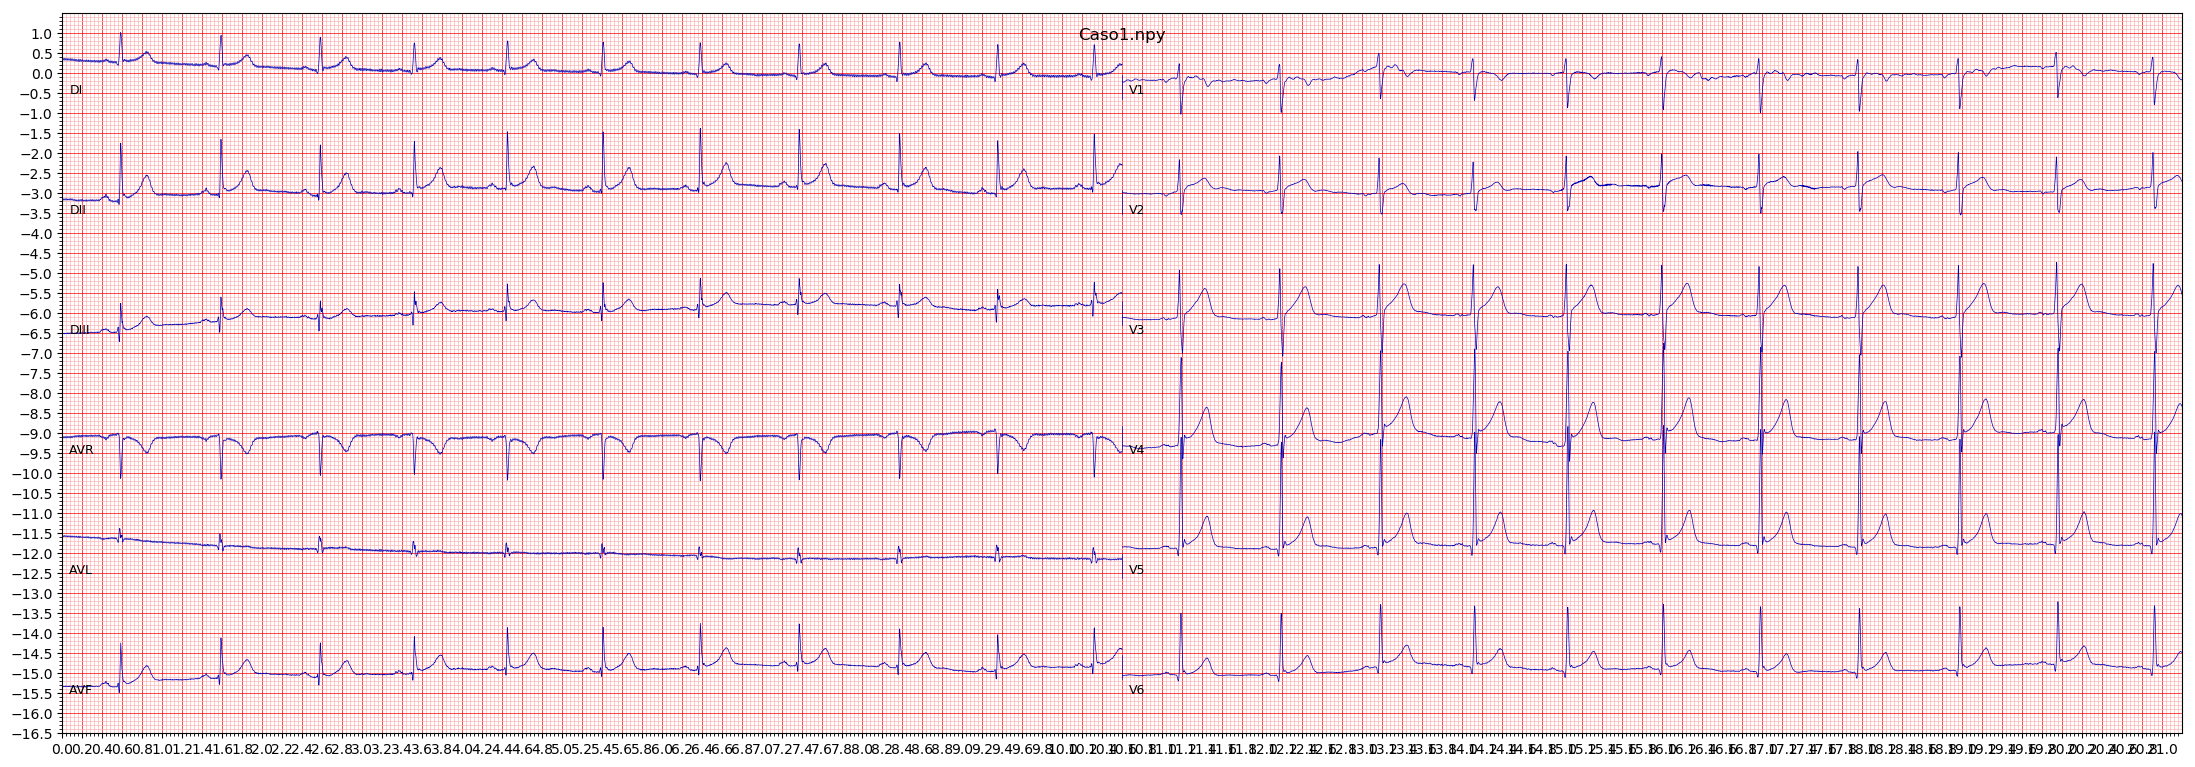

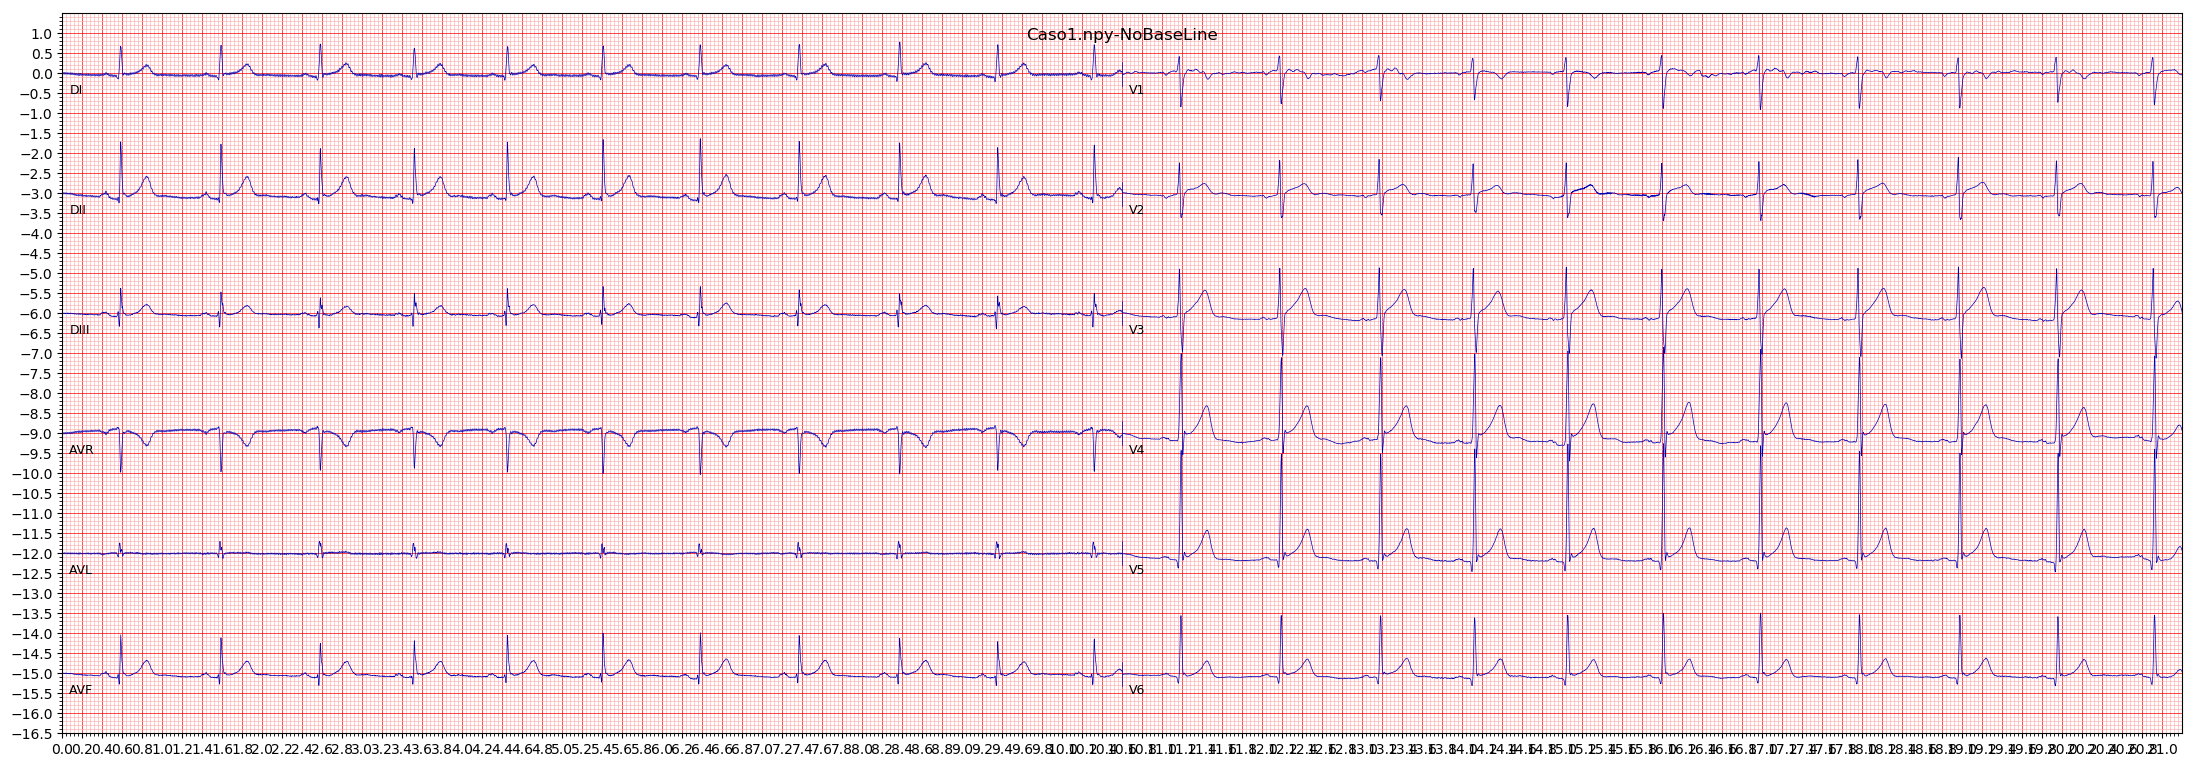

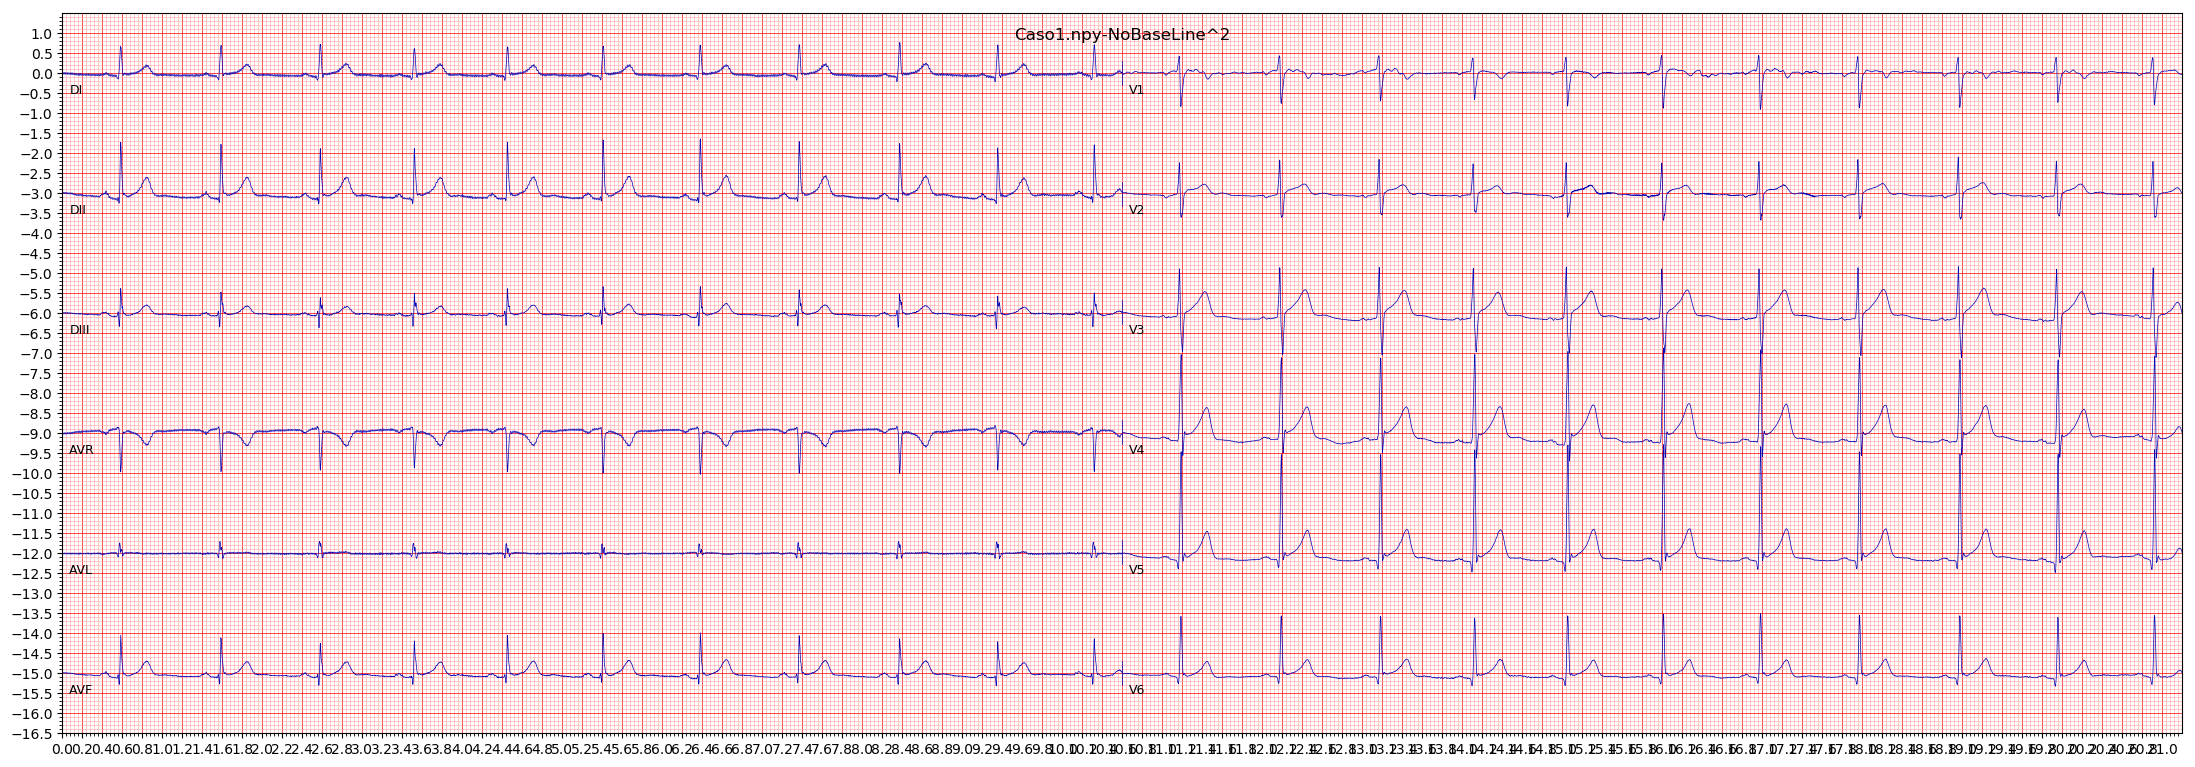

In [10]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def removeBaselineCompare(source,sample_rate=500):
    # i=1
    # for filename in os.listdir(source):
    for filename in ["Caso1.npy","Caso2.npy","Caso3.npy","Caso4.npy","Caso5.npy","Caso6.npy"]:
        fsource = os.path.join(source, filename)

        # if os.path.isfile(fsource) and fsource.endswith(f'Caso{i}.npy'):
        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            fSample=500
            xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
            
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
            
            sos = remove_baseline_filter(fSample)
            data = sgn.sosfiltfilt(sos, data, padtype='constant', axis=-1)
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine")
            sos2 = remove_baseline_filter(fSample)
            data2 = sgn.sosfiltfilt(sos2, data, padtype='constant', axis=-1)
            ep.plot(data2, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine^2")
            print(data)
            print(data2)
            print(np.array_equal(data,data2))
            break
            # np.save(os.path.join(source,f'Caso{i}-NoBL'),data)
            # np.save(os.path.join(source,f'{filename[:-4]}-NoBL'),data)
        #     i+=1
        # if(i>7):
        #     break
    
removeBaselineCompare('drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy')

## Hacer one_hot a los CSV de Chapman

In [26]:
from libs import *
from configVars import *
df = pandas.read_csv(f"{pathCasos}Chapman/val.csv")
# Get one hot encoding of columns B
one_hot = pandas.get_dummies(df['label'],prefix='label')
# Drop column B as it is now encoded
# df = df.drop('B',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df = df[['id', 'age', 'sex', 'label_0','label_1','label_2','label_3', 'r_count','length']]
df.head()
df.to_csv(f"{pathCasos}Chapman/val2.csv", index=False)
# cols = df.columns.tolist()
# cols

## Observar un caso

Observar un caso numpy para ver su formato

In [19]:
%cd ..
!ls

/scratch/tfg_luis_2223
drive  LightX3ECG  MostrarCasos.ipynb  PrediccionesLightX3ECG.ipynb


(12, 5300)
[[ 0.11   0.115  0.125 ...  0.155  0.155  0.155]
 [ 0.265  0.265  0.27  ...  0.205  0.205  0.21 ]
 [ 0.155  0.15   0.145 ...  0.05   0.05   0.055]
 ...
 [ 0.43   0.425  0.425 ...  0.065  0.065  0.065]
 [ 0.165  0.155  0.155 ... -0.025 -0.025 -0.03 ]
 [ 0.48   0.48   0.48  ...  0.23   0.23   0.23 ]]


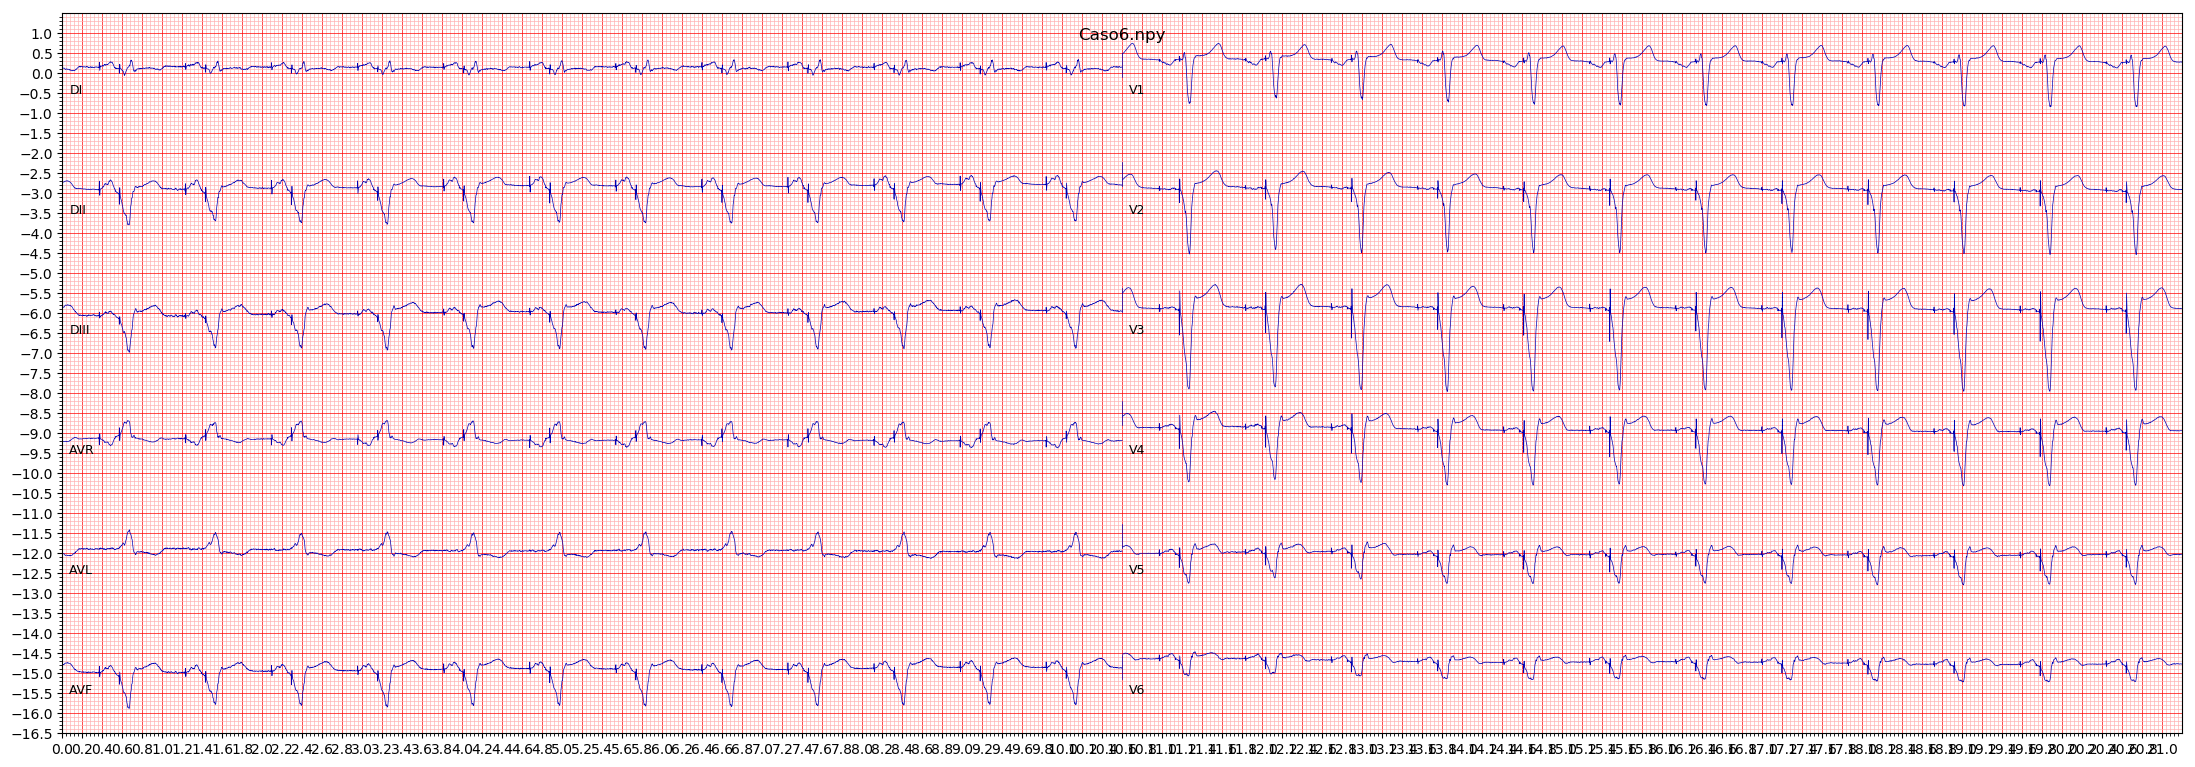

In [22]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy'

for filename in os.listdir(source):
    fsource = os.path.join(source, filename)

    if os.path.isfile(fsource) and fsource.endswith('Caso6.npy'):

        # save np.load
        #np_load_old = np.load

        # modify the default parameters of np.load
        #np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

        # call load_data with allow_pickle implicitly set to true
        data = np.load(fsource)
        
        fSample=500
        xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
        
        print(data.shape)
        print(data*200)
        # restore np.load for future normal usage
        #np.load = np_load_old
        break;

Se supone que con la versión de numpy 1.16.1 tiene el allow_pickle a True por defecto, lo que evita errores, igualmente es un último recurso usar una versión anterior.

In [ ]:
!pip install numpy==1.16.1

## Apunte

Mirar función loadmat para poder abri los archivos .mat desde python. Mirar Scipy para esa función. 

Ejemplo: https://mdrk.io/end-to-end-example-of-a-deep-learning-based-project-in-healthcare-electrocardiograms-part-1/

Craft

Ejecutar desde scratch porque por red local va lento, en esas máquinas no hay limitación. Tiene 4 GPUs. Revisar cuantas leads usa y cuáles son. Probar con Chapman y predecir cuando el modelo esté guardado en una carpeta persistente.

* ~~Comprobar r_count (número de latidos) y sacar datos de val y train para usar de test sin que se haya entrenado con ello.~~
* ~~Revisar el formato de los datos nuestros Caso1-6.Recordar lo de los 200 mV.~~
* ~~Mover los datos al directorio scratch.~~
* ~~Subir epoch a 70.~~
* ~~Conseguir datos de Chapman que usa Khiem.~~
* Probar si el entrenamiento sin línea de base mejora los resultados de las predicciones. (baseline removal)
* ~~Comprobar si un caso al que se le ha quitado la baseline sigue igual si se la vuelves a quitar. --> Gráficamente parecen iguales pero los valores de los numpy arrays cambian~~
* ~~Representar los datos de test con ecg_plot. -->~~
* ~~Comprobar si los suyos son muy distintos de los nuestros al hacer un plot. Ver si puede haber línea base o qué. -->~~
* ~~Reproducir tabla 2 del paper (f1,precision,etc). Investigar dónde obtiene esas medidas.~~
* ~~Revisar qué labels se corresponden con qué enfermedad en Chapman.~~
* ~~Ajustar nuestros casos al formato csv de Chapman.~~

23/3/2023
* Comprobar a predecir Chapman con CPSC-2018. --> Para poder hacerlo hay que añadir columnas vacías al Chapman Onehot. Probar con columnas a 0 de la label_5 a las label_8 incluidas con el parametro num_classes a 9.
* Probar con casos (por ejemplo SB) coincidentes entre datasets.
* Conseguir entrenar con los modelos con resultados razonables.

* XML --> Sierra --> CSV --> Predecir.

* Crear repositorio privado con lo mismo que el actual y los casos si es posible.
* Recordar ver parte de teoría (vídeos,libro).

* Gradio --> la página de demostración no funciona??
* Streamlit --> transformar código de python a una web